In [2]:
# !pip install pandas
# !pip install sklearn
# !pip install scipy
# !pip install pandas_profiling
# !pip install tabulate
# !pip install matplotlib
! pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 8.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd 
import numpy as np
import statistics as st
from tabulate import tabulate
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px

# Read Data

In [4]:
# Read csv file 
# PARAMATER: csv file name
# returns pandas dataframe 

def read_csv(fname):
    data =  pd.read_csv(fname, low_memory = False)
    # Fill missing values with NaN
    data = data.replace(" ", np.nan)
    data = data.replace("", np.nan)
    return data


data = read_csv("tmpdfeo3qy2.csv")
data.head(5)

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0       222076257           619                 NaN   
1       222053099          2670                 NaN   
2       222039411          3201                 NaN   
3       222011090          3201                 NaN   
4       222062685          3201                 NaN   

               OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  SHOOTING  \
0               LARCENY ALL OTHERS       D4            167         0   
1  HARASSMENT/ CRIMINAL HARASSMENT       A7            NaN         0   
2         PROPERTY - LOST/ MISSING      D14            778         0   
3         PROPERTY - LOST/ MISSING       B3            465         0   
4         PROPERTY - LOST/ MISSING       B3            465         0   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
0  2022-01-01 00:00:00  2022      1    Saturday     0       NaN   
1  2022-01-01 00:00:00  2022      1    Saturday     0       NaN   
2  2022-01-01 00:00:00  2022      1    Saturday     0       NaN   
3  2022-01-01 00:00:00  2022      1    Saturday     0       NaN   
4  2022-01-01 00:00:00  2022      1    Saturday     0       NaN   

          STREET        Lat       Long  \
0   HARRISON AVE  42.339542 -71.069409   
1  BENNINGTON ST  42.377246 -71.032597   
2  WASHINGTON ST  42.349056 -71.150498   
3  BLUE HILL AVE  42.284826 -71.091374   
4  BLUE HILL AVE  42.284826 -71.091374   

                                  Location  
0  (42.33954198983014, -71.06940876967543)  
1   (42.37724638479816, -71.0325970804128)  
2  (42.34905600030506, -71.15049849975023)  
3  (42.28482576580488, -71.09137368938802)  
4  (42.28482576580488, -71.09137368938802)

# Determine Column Counts for Numeric and Object Columns

In [5]:
# Determine the number of missing values and the missing percentage
# PARAMETER: pandas dataframe
# returns pandas dataframe 

def determine_column_counts(df):
    columns = df.columns
    data_counts = pd.DataFrame(columns = ['column_name','column_type','distinct_data', 'distinct_percent', 'missing_data', 'missing_percentage'])
    
    #For each column, calculate number and percentage of missing rows and distinct counts
    for col in columns:
        col_vals = df[col]
        col_missing = sum(col_vals.isnull())
        missing_percent = round((col_missing / len(df[col])) * 100 , 3)
        col_distinct = (col_vals.nunique())
        distinct_percent = round((col_distinct / len(df[col])) * 100 , 3)
        
        # Append current col and caluclations to missing_data df 
        data_counts.loc[len(data_counts)] = [col, col_vals.dtype, col_distinct, distinct_percent, col_missing, missing_percent]
        
#     print(tabulate(data_counts, headers="keys", tablefmt="pipe"), "\n")
    return(data_counts)

In [6]:
# Extract all numeric columns of dataframe 
# PARAMETER: pandas dataframe
# returns pandas dataframe

def extract_numeric_cols(df):
    return(df._get_numeric_data())

# NUMERIC COLUMNS
numeric_cols = extract_numeric_cols(data)
print("Numeric Columns:", "\n")
print(numeric_cols.head(6), "\n")
numeric_column_counts = determine_column_counts(numeric_cols)


numeric_column_counts.head(6)


Numeric Columns: 

   OFFENSE_CODE  OFFENSE_CODE_GROUP  SHOOTING  YEAR  MONTH  HOUR  UCR_PART  \
0           619                 NaN         0  2022      1     0       NaN   
1          2670                 NaN         0  2022      1     0       NaN   
2          3201                 NaN         0  2022      1     0       NaN   
3          3201                 NaN         0  2022      1     0       NaN   
4          3201                 NaN         0  2022      1     0       NaN   
5          3115                 NaN         0  2022      1     0       NaN   

         Lat       Long  
0  42.339542 -71.069409  
1  42.377246 -71.032597  
2  42.349056 -71.150498  
3  42.284826 -71.091374  
4  42.284826 -71.091374  
5  42.362936 -71.052538   



column_name column_type  distinct_data  distinct_percent  \
0        OFFENSE_CODE       int64            119             0.161   
1  OFFENSE_CODE_GROUP     float64              0             0.000   
2            SHOOTING       int64              2             0.003   
3                YEAR       int64              1             0.001   
4               MONTH       int64             12             0.016   
5                HOUR       int64             24             0.032   

   missing_data  missing_percentage  
0             0                 0.0  
1         73852               100.0  
2             0                 0.0  
3             0                 0.0  
4             0                 0.0  
5             0                 0.0

In [7]:
# Extract all object columns of dataframe 
# PARAMETER: pandas dataframe
# returns pandas dataframe

def extract_object_cols(df):
    return (df.select_dtypes(include = object))


#OBJECT COLUMNS
object_cols = extract_object_cols(data)
print("Object Columns:", "\n")
print(object_cols.columns, "\n")
object_column_counts = determine_column_counts(object_cols)

object_column_counts.head(6)


Object Columns: 

Index(['INCIDENT_NUMBER', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA',
       'OCCURRED_ON_DATE', 'DAY_OF_WEEK', 'STREET', 'Location'],
      dtype='object') 



column_name column_type  distinct_data  distinct_percent  \
0      INCIDENT_NUMBER      object          73852           100.000   
1  OFFENSE_DESCRIPTION      object            120             0.162   
2             DISTRICT      object             13             0.018   
3       REPORTING_AREA      object            845             1.144   
4     OCCURRED_ON_DATE      object          59770            80.932   
5          DAY_OF_WEEK      object              7             0.009   

   missing_data  missing_percentage  
0             0               0.000  
1             0               0.000  
2           171               0.232  
3         44448              60.185  
4             0               0.000  
5             0               0.000

### Integer and Float columns: 
    OFFENSE_CODE, OFFENSE_CODE_GROUP, YEAR, MONTH,HOUR, UCR_PART, LAT, LONG
    
### Object Columns: 
    INCIDENT_NUMBER,OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, OCCURRED_ON_DATE, DAY_OF_WEEK, STREET, Location
   
   
## Missing Data

For numeric columns with missing values, imputation can be used to fill in these rows. For example, mean, median, or mode imputation can be utilized. This technique will fill any missing values with the specified statistic. If mode imputation is selected, the mode value of the column will used to fill in any missing values. Other possible techniques can include Linear Regression or K-Nearest Neighbors (KNN) Imputation. These techniques allow for slighlty more complex relationships to be utilzied when imputing missing values. Linear Regression Imputation can be used when there is a linear relationship between the missing variable and another well-defined variable in the dataset. KNN Imputation can allow for the consideration of similar samples to impute any missing data. This technique will impute missing values with the average of the KNN values. 

For object coumns there are similar techniques that can be utilized to impute missing values. Mode imputation is a simple approach that fills missing values with the mode category of the column. If mode imputation does not suit the needs of the dataset, constant value imputation can be used, where a predefined value is used to represent missing data. More complex methods like predicitive modeling and KNN can also be used to impute missing values. 

The method chosen for imputing values depends on the use case for a specific dataset and the type of information desired. 


In [8]:
def generate_cleaning_strategies(df, zscore_threshold=3, outlier_handling_method='drop'):
    cleaning_strategies = {}
    
    categorical_columns = df.select_dtypes(include='object')
    numeric_columns = df.select_dtypes(include=['int64', 'float64'])

    for column in categorical_columns:
        missing_percentage = (df[column].isnull().sum() / len(df)) * 100
        distinct_percentage = (df[column].nunique() / len(df)) * 100

        if missing_percentage >= 50:
            cleaning_strategies[column] = ['Remove column', 'High missing percentage']
        elif distinct_percentage >= 90:
            cleaning_strategies[column] = ['Remove rows with missing values', 'High distinct percentage']
        else:
            cleaning_strategies[column] = ['Impute missing values with mode', '']

    for column in numeric_columns:
        missing_percentage = (df[column].isnull().sum() / len(df)) * 100

        if missing_percentage >= 50:
            cleaning_strategies[column] = ['Remove column', 'High missing percentage']
        else:
            cleaning_strategies[column] = ['Impute missing values with median', '']

        # Add outlier detection and handling strategies to the cleaning strategies
        if outlier_handling_method == 'drop':
            cleaning_strategies[column].append('Drop rows with outliers')
        elif outlier_handling_method == 'replace_with_median':
            cleaning_strategies[column].append('Replace outliers with median')
        elif outlier_handling_method == 'replace_with_nan':
            cleaning_strategies[column].append('Replace outliers with NaN')
            
    

    return cleaning_strategies


In [9]:
#Data Cleaning Strategies
cleaning_strategies = generate_cleaning_strategies(data)

#Create Data Cleaning Strategies DF 
cleaning_strategies_table = [[column, strategy[0], strategy[1]] for column, strategy in cleaning_strategies.items()]
headers = ["Column", "Cleaning Strategy", "Reason"]
cleaning_strategies_df = pd.DataFrame(cleaning_strategies_table, columns = headers)

cleaning_strategies_df


Column                  Cleaning Strategy  \
0       INCIDENT_NUMBER    Remove rows with missing values   
1   OFFENSE_DESCRIPTION    Impute missing values with mode   
2              DISTRICT    Impute missing values with mode   
3        REPORTING_AREA                      Remove column   
4      OCCURRED_ON_DATE    Impute missing values with mode   
5           DAY_OF_WEEK    Impute missing values with mode   
6                STREET    Impute missing values with mode   
7              Location    Impute missing values with mode   
8          OFFENSE_CODE  Impute missing values with median   
9    OFFENSE_CODE_GROUP                      Remove column   
10             SHOOTING  Impute missing values with median   
11                 YEAR  Impute missing values with median   
12                MONTH  Impute missing values with median   
13                 HOUR  Impute missing values with median   
14             UCR_PART                      Remove column   
15                  Lat  Impute missing values with median   
16                 Long  Impute missing values with median   

                      Reason  
0   High distinct percentage  
1                             
2                             
3    High missing percentage  
4                             
5                             
6                             
7                             
8                             
9    High missing percentage  
10                            
11                            
12                            
13                            
14   High missing percentage  
15                            
16

In [10]:
def apply_cleaning_strategy(df, column, cleaning_strategy):
    if cleaning_strategy == 'Remove column':
        df.drop(column, axis=1, inplace=True)
    elif cleaning_strategy == 'Remove rows with missing values':
        df.dropna(subset=[column], inplace=True)
    elif cleaning_strategy == 'Impute missing values with mode':
        df[column].fillna(df[column].mode()[0], inplace=True)
    elif cleaning_strategy == 'Impute missing values with median':
        df[column].fillna(df[column].median(), inplace=True)
    elif cleaning_strategy == 'Drop rows with outliers':
        df = df[~detect_outliers_zscore(df[column])]
    elif cleaning_strategy == 'Replace outliers with median':
        df.loc[detect_outliers_zscore(df[column]), column] = df[column].median()
    elif cleaning_strategy == 'Replace outliers with NaN':
        df.loc[detect_outliers_zscore(df[column]), column] = np.nan

    return df


def clean_data(df, cleaning_strategies):
    for column, strategy in cleaning_strategies.items():
        df = apply_cleaning_strategy(df, column, strategy[0])

    return df


#Clean Data According to cleaning strategies 
cleaned_data = clean_data(data, cleaning_strategies)
cleaned_data

INCIDENT_NUMBER  OFFENSE_CODE                    OFFENSE_DESCRIPTION  \
0           222076257           619                     LARCENY ALL OTHERS   
1           222053099          2670        HARASSMENT/ CRIMINAL HARASSMENT   
2           222039411          3201               PROPERTY - LOST/ MISSING   
3           222011090          3201               PROPERTY - LOST/ MISSING   
4           222062685          3201               PROPERTY - LOST/ MISSING   
...               ...           ...                                    ...   
73847       232000091          1402                              VANDALISM   
73848       232000002          3831  M/V - LEAVING SCENE - PROPERTY DAMAGE   
73849       232000140           619                     LARCENY ALL OTHERS   
73850       232000315          3201               PROPERTY - LOST/ MISSING   
73851       232000052          3114                   INVESTIGATE PROPERTY   

      DISTRICT  SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0           D4         0  2022-01-01 00:00:00  2022      1    Saturday     0   
1           A7         0  2022-01-01 00:00:00  2022      1    Saturday     0   
2          D14         0  2022-01-01 00:00:00  2022      1    Saturday     0   
3           B3         0  2022-01-01 00:00:00  2022      1    Saturday     0   
4           B3         0  2022-01-01 00:00:00  2022      1    Saturday     0   
...        ...       ...                  ...   ...    ...         ...   ...   
73847       A1         0  2022-12-31 23:30:00  2022     12    Saturday    23   
73848      C11         0  2022-12-31 23:37:00  2022     12    Saturday    23   
73849      D14         0  2022-12-31 23:45:00  2022     12    Saturday    23   
73850       D4         0  2022-12-31 23:50:00  2022     12    Saturday    23   
73851       A1         0  2022-12-31 23:50:00  2022     12    Saturday    23   

                STREET        Lat       Long  \
0         HARRISON AVE  42.339542 -71.069409   
1        BENNINGTON ST  42.377246 -71.032597   
2        WASHINGTON ST  42.349056 -71.150498   
3        BLUE HILL AVE  42.284826 -71.091374   
4        BLUE HILL AVE  42.284826 -71.091374   
...                ...        ...        ...   
73847       CHARLES ST  42.359790 -71.070782   
73848      COLUMBIA RD  42.319593 -71.062607   
73849    WASHINGTON ST  42.349056 -71.150498   
73850  HARRISON AVENUE  42.328663 -71.077665   
73851  MOUNT VERNON ST  42.357879 -71.069680   

                                       Location  
0       (42.33954198983014, -71.06940876967543)  
1        (42.37724638479816, -71.0325970804128)  
2       (42.34905600030506, -71.15049849975023)  
3       (42.28482576580488, -71.09137368938802)  
4       (42.28482576580488, -71.09137368938802)  
...                                         ...  
73847   (42.35979037458775, -71.07078234449541)  
73848   (42.31959298334654, -71.06260699634272)  
73849   (42.34905600030506, -71.15049849975023)  
73850   (42.29755532959655, -71.05970910242573)  
73851  (42.357878706878985, -71.06967973039733)  

[73852 rows x 14 columns]

In [11]:
#Check to see if any missing data left 
missing_data = determine_column_counts(data)
missing_data

column_name column_type  distinct_data  distinct_percent  \
0       INCIDENT_NUMBER      object          73852           100.000   
1          OFFENSE_CODE       int64            119             0.161   
2   OFFENSE_DESCRIPTION      object            120             0.162   
3              DISTRICT      object             13             0.018   
4              SHOOTING       int64              2             0.003   
5      OCCURRED_ON_DATE      object          59770            80.932   
6                  YEAR       int64              1             0.001   
7                 MONTH       int64             12             0.016   
8           DAY_OF_WEEK      object              7             0.009   
9                  HOUR       int64             24             0.032   
10               STREET      object           8377            11.343   
11                  Lat     float64          12542            16.983   
12                 Long     float64          12542            16.983   
13             Location      object          12542            16.983   

    missing_data  missing_percentage  
0              0                 0.0  
1              0                 0.0  
2              0                 0.0  
3              0                 0.0  
4              0                 0.0  
5              0                 0.0  
6              0                 0.0  
7              0                 0.0  
8              0                 0.0  
9              0                 0.0  
10             0                 0.0  
11             0                 0.0  
12             0                 0.0  
13             0                 0.0

##### The data is now cleaned as there is no missing data and any columns that need to be removed have been removed. 

# Univariate Analysis

In [12]:
cleaned_data

INCIDENT_NUMBER  OFFENSE_CODE                    OFFENSE_DESCRIPTION  \
0           222076257           619                     LARCENY ALL OTHERS   
1           222053099          2670        HARASSMENT/ CRIMINAL HARASSMENT   
2           222039411          3201               PROPERTY - LOST/ MISSING   
3           222011090          3201               PROPERTY - LOST/ MISSING   
4           222062685          3201               PROPERTY - LOST/ MISSING   
...               ...           ...                                    ...   
73847       232000091          1402                              VANDALISM   
73848       232000002          3831  M/V - LEAVING SCENE - PROPERTY DAMAGE   
73849       232000140           619                     LARCENY ALL OTHERS   
73850       232000315          3201               PROPERTY - LOST/ MISSING   
73851       232000052          3114                   INVESTIGATE PROPERTY   

      DISTRICT  SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0           D4         0  2022-01-01 00:00:00  2022      1    Saturday     0   
1           A7         0  2022-01-01 00:00:00  2022      1    Saturday     0   
2          D14         0  2022-01-01 00:00:00  2022      1    Saturday     0   
3           B3         0  2022-01-01 00:00:00  2022      1    Saturday     0   
4           B3         0  2022-01-01 00:00:00  2022      1    Saturday     0   
...        ...       ...                  ...   ...    ...         ...   ...   
73847       A1         0  2022-12-31 23:30:00  2022     12    Saturday    23   
73848      C11         0  2022-12-31 23:37:00  2022     12    Saturday    23   
73849      D14         0  2022-12-31 23:45:00  2022     12    Saturday    23   
73850       D4         0  2022-12-31 23:50:00  2022     12    Saturday    23   
73851       A1         0  2022-12-31 23:50:00  2022     12    Saturday    23   

                STREET        Lat       Long  \
0         HARRISON AVE  42.339542 -71.069409   
1        BENNINGTON ST  42.377246 -71.032597   
2        WASHINGTON ST  42.349056 -71.150498   
3        BLUE HILL AVE  42.284826 -71.091374   
4        BLUE HILL AVE  42.284826 -71.091374   
...                ...        ...        ...   
73847       CHARLES ST  42.359790 -71.070782   
73848      COLUMBIA RD  42.319593 -71.062607   
73849    WASHINGTON ST  42.349056 -71.150498   
73850  HARRISON AVENUE  42.328663 -71.077665   
73851  MOUNT VERNON ST  42.357879 -71.069680   

                                       Location  
0       (42.33954198983014, -71.06940876967543)  
1        (42.37724638479816, -71.0325970804128)  
2       (42.34905600030506, -71.15049849975023)  
3       (42.28482576580488, -71.09137368938802)  
4       (42.28482576580488, -71.09137368938802)  
...                                         ...  
73847   (42.35979037458775, -71.07078234449541)  
73848   (42.31959298334654, -71.06260699634272)  
73849   (42.34905600030506, -71.15049849975023)  
73850   (42.29755532959655, -71.05970910242573)  
73851  (42.357878706878985, -71.06967973039733)  

[73852 rows x 14 columns]

Text(0.5, 1.0, 'Offense Code Counts')

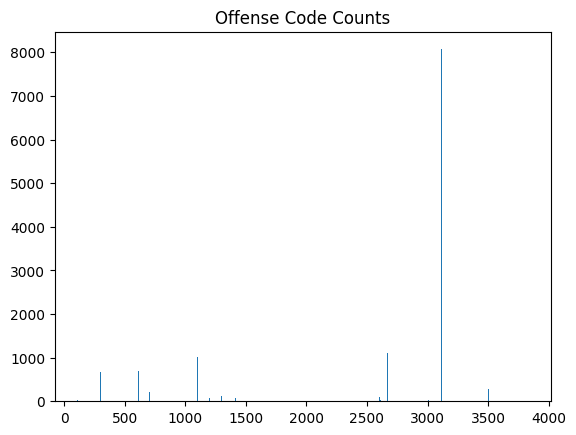

In [13]:
categories = cleaned_data['OFFENSE_CODE'].value_counts().index
counts = cleaned_data['OFFENSE_CODE'].value_counts().values
plt.bar(categories, counts, width = 1)
plt.title("Offense Code Counts")

Text(0.5, 1.0, 'District Counts')

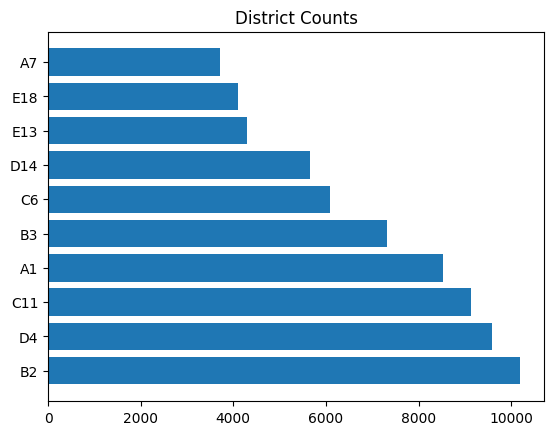

In [14]:
categories = cleaned_data['DISTRICT'].value_counts().index
counts = cleaned_data['DISTRICT'].value_counts().values
plt.barh(categories[0:10], counts[0:10])
plt.title("District Counts")

Text(0.5, 1.0, 'Shooting Counts')

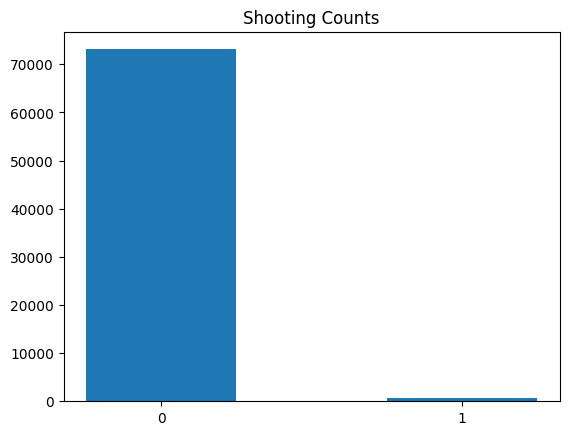

In [15]:
categories = cleaned_data['SHOOTING'].value_counts().index
counts = cleaned_data['SHOOTING'].value_counts().values
plt.bar(categories, counts, width = 0.5)
plt.xticks(categories)
plt.title("Shooting Counts")

Text(0.5, 1.0, 'Offense Description Counts')

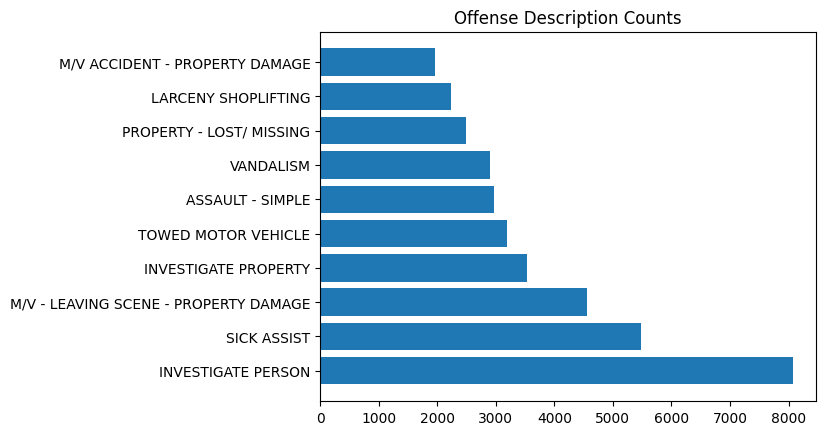

In [16]:
categories = cleaned_data['OFFENSE_DESCRIPTION'].value_counts().index
counts = cleaned_data['OFFENSE_DESCRIPTION'].value_counts().values
plt.barh(categories[0:10], counts[0:10])
plt.title("Offense Description Counts")

Text(0.5, 1.0, 'Occured On Date Counts')

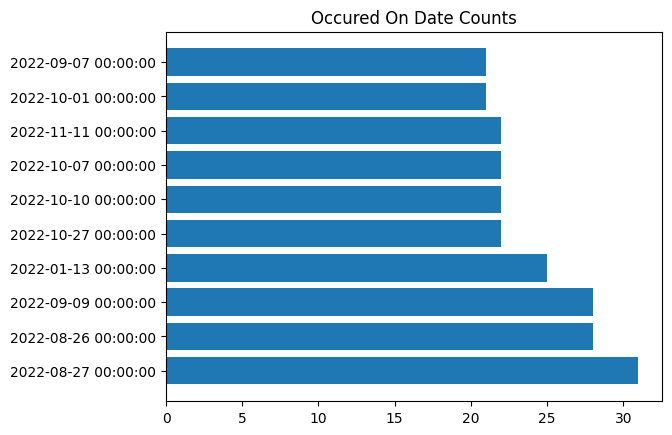

In [17]:
categories = cleaned_data['OCCURRED_ON_DATE'].value_counts().index
counts = cleaned_data['OCCURRED_ON_DATE'].value_counts().values
plt.barh(categories[0:10], counts[0:10])
plt.title("Occured On Date Counts")

Text(0.5, 1.0, 'Month Counts')

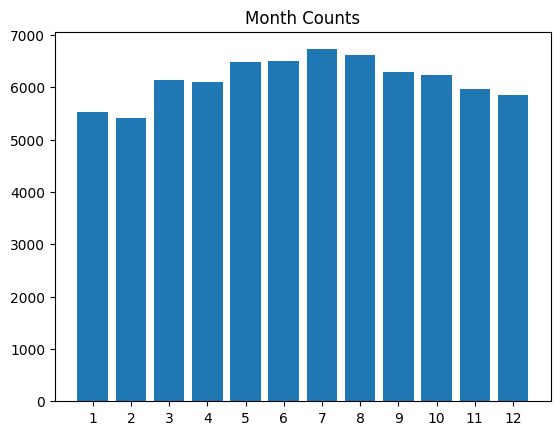

In [18]:
categories = cleaned_data['MONTH'].value_counts().index
counts = cleaned_data['MONTH'].value_counts().values
plt.bar(categories, counts)
plt.xticks(np.arange(1,13, step = 1))
plt.title("Month Counts")

Text(0.5, 1.0, 'Day of Week Counts')

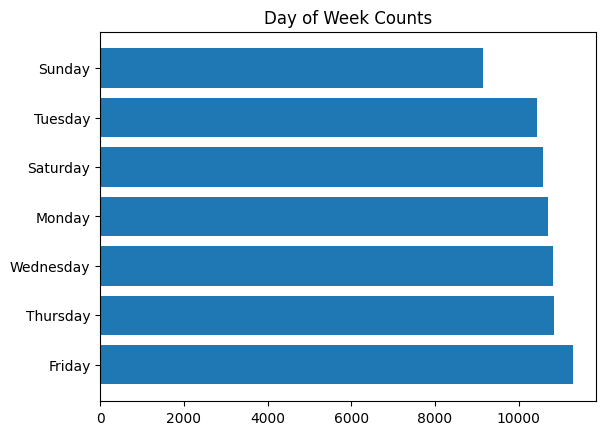

In [19]:
categories = cleaned_data['DAY_OF_WEEK'].value_counts().index
counts = cleaned_data['DAY_OF_WEEK'].value_counts().values
plt.barh(categories, counts)
plt.title("Day of Week Counts")

Text(0.5, 1.0, 'Hour Counts')

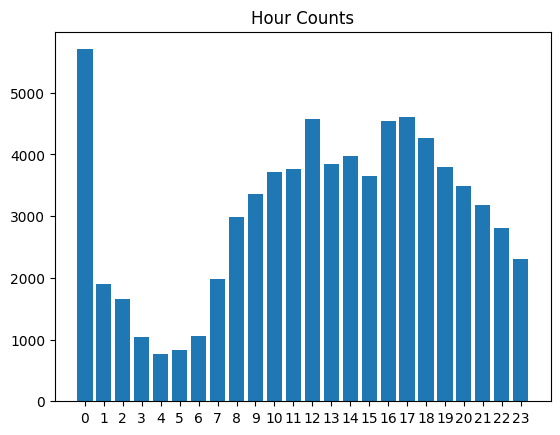

In [20]:
categories = cleaned_data['HOUR'].value_counts().index
counts = cleaned_data['HOUR'].value_counts().values
plt.bar(categories, counts)
plt.xticks(np.arange(0,24, step = 1))
plt.title("Hour Counts")

Text(0.5, 1.0, 'Street Counts')

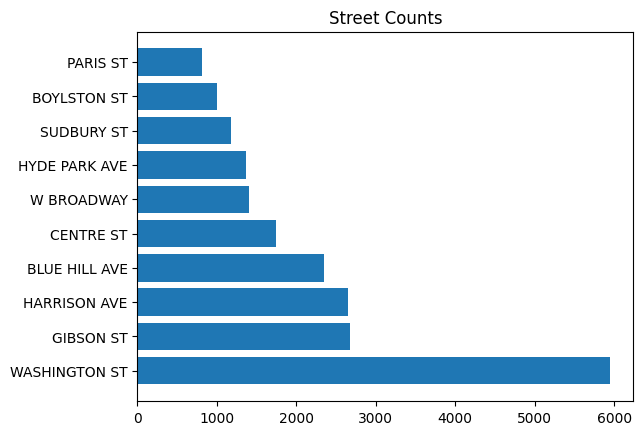

In [21]:
categories = cleaned_data['STREET'].value_counts().index
counts = cleaned_data['STREET'].value_counts().values
plt.barh(categories[0:10], counts[0:10])
plt.title("Street Counts")

In [46]:
loc_counts = pd.DataFrame()
lat = []
long = []
loc_counts['Location'] = cleaned_data['Location'].value_counts().index
loc_counts['Lat'] =  cleaned_data['Lat'].value_counts().index
loc_counts['Long'] =  cleaned_data['Long'].value_counts().index
loc_counts['Counts'] =cleaned_data['Location'].value_counts().values

loc_counts.head(5)

fig = px.density_mapbox(loc_counts, lat='Lat', lon='Long', z='Counts',
                        mapbox_style="stamen-terrain")
 
fig